# Fandango rating analysis
This is project is about analysing the distribution of movie ratings on the website Fandango, in particular to compare the discrepancies between the displayed score and the star rating displayed.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
fandango_score_comp = pd.read_csv('fandango_score_comparison.csv')

In [37]:
fandango_prev = fandango_score_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_prev.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [38]:
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [39]:
fandango_after = movie_ratings[['movie', 'year', 'fandango']].copy()
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Sampling favors popular movies i.e. movies with larger number of reviews, this can cause an inherent skewedness towards higher scores.

Goal is to compare whether Fandango rating distribution of popular movies have changed between the original analysis and the follow-up data collection, as that could serve as a proof that Fandango is still manipulating star ratings.

In [40]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [41]:
fandango_prev['year'] = fandango_prev['FILM'].str.extract(r'\(([0-9]*)\)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
fandango_prev_2015 = fandango_prev[fandango_prev['year'] == '2015']

In [47]:
fandango_after_2016 = fandango_after[fandango_after['year'] == 2016]

In [53]:
fandango_prev_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [55]:
fandango_after_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

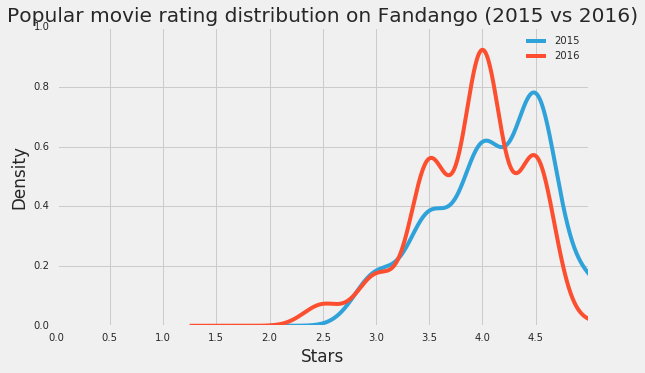

In [76]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango_prev_2015['Fandango_Stars'].plot.kde(label='2015',
                                              title='Popular movie rating distribution on Fandango (2015 vs 2016)',
                                              figsize=(8.5,5),
                                              legend=True)

fandango_after_2016['fandango'].plot.kde(label='2016', legend=True)

plt.xticks(np.arange(0,5,0.5))
plt.xlim(0,5)
plt.xlabel('Stars')
plt.ylabel('Density')


Both plots have a left-skewed (negatively) shape which is very similar. However, for 2016 the peak is lower (4.0) compared to 2015 (4.5) which indicated that there could be a decrease in the star ratings.
The star interval between 3.0 and 5.0 are approximately following normal distribution for the 2016 dataset.

In [83]:
fandango_prev_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [84]:
fandango_after_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Compared to 2015 there are now movies:
* with 2.5 stars
* more movies with 3.5 and 4.0 stars,
* significantly fewer movies with 4.5 and 5.0 start

In [86]:
fandango_prev_2015['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [88]:
fandango_after_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

In [114]:
mode_2015 = fandango_prev_2015['Fandango_Stars'].mode()[0]
median_2015 = fandango_prev_2015['Fandango_Stars'].median()
mean_2015 = fandango_prev_2015['Fandango_Stars'].mean()

mode_2016 = fandango_after_2016['fandango'].mode()[0]
median_2016 = fandango_after_2016['fandango'].median()
mean_2016 = fandango_after_2016['fandango'].mean()

In [120]:
plot_df = pd.DataFrame()
plot_df['2015'] = [mean_2015, median_2015, mode_2015]
plot_df['2016'] = [mean_2016, median_2016, mode_2016]
plot_df.index = ['mean', 'median', 'mode']
plot_df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


TypeError: title() missing 1 required positional argument: 's'

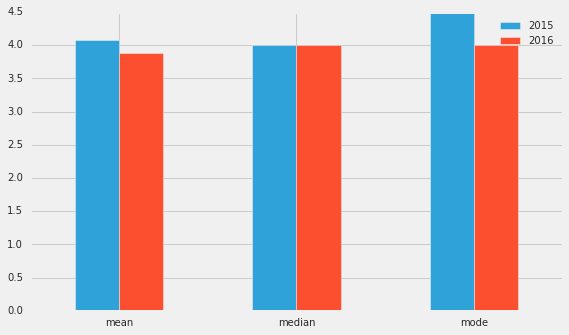

In [134]:
plot_df.plot.bar(rot=0, figsize=(8.5,5))
plt.title(title='Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.yticks(np.arange(0,5.01,0.5))
plt.ylim((0,5))
plt.ylabel('Stars')
plt.legend(loc='upper center',framealpha=0)